# ENSEMBLE LEARNING TECHNIQUES

Credit is for Dr. Samuel Otim who had shared the code!

Revisions done: additional text explanations about the statistics, removal/additional content to match the learning material we have covered, and additional functions to display prediction/probabiliy.

---------------------------

The goal behind ensemble methods is to combine different classifiers 
into a meta-classifier that has a better generalization performance than 
each individual classifier alone.

Different Approaches examined here:
* Majority vote classifier
* Sub-sample/sub-feature methods: random forest and bagging
* Boosting methods: AdaBoost and XGBoost



## STEP 1: IMPORT THE DATA

The data is from UCI Machine Learning Archive
https://archive.ics.uci.edu/ml/datasets/banknote+authentication

#### Entropy
Entropy is the amount of uncertainty. It is used in many fields, including machine learning. In machine learning, we can say that entropy is amount of randomness in the information being processed.

### Some measures of dispersion
Measures of dispersion are values that describe how the data varies. It gives us a sense of how much the data tends to diverge from the typical value, while central measures give us an idea about the typical value of the distribution.

#### Variance: 
- an important measure in descriptive statistics because it allows us to measure the spread of a data set around its mean

#### Skewness:
- whether the distribution has a longer tail on one side or the other or has left-right symmetry. It is commonly calculated by taking the mean of the cubes of differences of each point from the mean and then dividing it by the cube of the standard deviation. This gives a coefficient that is independent of the units of the observations.
- positive: right skewed, negative: left skewed, zero: normal

#### Kurtosis
- describe the degree to which scores clusters in the tails or the peak, i.e., heavy tailed or light tailed. Low kurtosis data has light tails, or lack of outliers

In [1]:
# Please comment the below line if scikit-image module is readily available
#!pip install scikit-image

In [2]:
import pandas as pd
df = pd.read_csv('data_banknote_authentication.csv')

#provide column headers
cols = ['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Class']
df.columns = cols

#view sample data
df.head()

,Variance,Skewness,Kurtosis,Entropy,Class
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


## STEP 2: PROCESS THE DATA

In [3]:
from sklearn.model_selection import train_test_split

#create a matrix of predictors and a vector of outcome variable
X = df.drop('Class', axis=1) #drop the last column (ie., Class)
y = df['Class'] #Class is the outcome variable

#split the dataset into 70% training set and 30% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#check data
X_train.head()

,Variance,Skewness,Kurtosis,Entropy
879,-2.3518,-4.8359,6.64790,-0.060358
783,-3.4083,4.8587,-0.76888,-4.866800
605,-1.4275,11.8797,0.41613,-6.997800
1252,-4.5531,-12.5854,15.44170,-1.498300
497,0.5706,-0.0248,1.24210,-0.562100


## STEP 3: LOAD REQUIRED LIBRARIES

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, log_loss

## STEP 4: IMPLEMENT VARIOUS CLASSIFICATION MODELS

In [5]:
#Names of the various classification approaches for easy presentation of the results
names = ["Logististic Regression", "Nearest Neighbors", "Linear SVM", "RBF SVM", 
         "Naive Bayes", "Decision Tree", "Majority Vote", "Random Forest", "Bagging",  
         "AdaBoost", "XGBoost"]

scores = [] #list variable to hold classification scores (predictive accuracy scores)

#Prepare models for VotingClassifier 
#creeate instances (i.e., objects) of the various classifiers
lr =LogisticRegression()
knn = KNeighborsClassifier(3)
linear_svc = SVC(kernel="linear", C=0.01, probability=True)
gamma_svc = SVC(gamma=2, C=1, probability=True)
dtc = DecisionTreeClassifier(max_depth=5)
gnbs = GaussianNB()

#specify the VotingClassifier() - create instance

mv_clf = VotingClassifier(estimators=[('lr', lr), ('knn', knn), ('linear_svc', linear_svc), 
                                      ('gamma_svc', gamma_svc), ('dtc', dtc)], voting='soft')

classifiers = [
    lr,
    knn,
    linear_svc,
    gamma_svc,
    gnbs,
    dtc,
    mv_clf,
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    BaggingClassifier(),
    AdaBoostClassifier(),
    XGBClassifier()]

#run classification models using Pipeline
for classifier in classifiers:
    pipeline = Pipeline(steps=[
                      ('classifier', classifier)])
    pipeline.fit(X_train, y_train)   
    print(classifier)
    scores.append(pipeline.score(X_test, y_test))
    print("model score: %.3f" % pipeline.score(X_test, y_test))
    print("\n -----------------------------------------------------------------------------------")
    
#end of pipeline

#Create a dataframe for prediction scores
scores_df = pd.DataFrame(zip(names,scores), columns=['Classifier', 'Accuracy Score'])

LogisticRegression()
model score: 0.985

 -----------------------------------------------------------------------------------
KNeighborsClassifier(n_neighbors=3)
model score: 0.998

 -----------------------------------------------------------------------------------
SVC(C=0.01, kernel='linear', probability=True)
model score: 0.983

 -----------------------------------------------------------------------------------
SVC(C=1, gamma=2, probability=True)
model score: 0.998

 -----------------------------------------------------------------------------------
GaussianNB()
model score: 0.842

 -----------------------------------------------------------------------------------
DecisionTreeClassifier(max_depth=5)
model score: 0.961

 -----------------------------------------------------------------------------------
VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('knn', KNeighborsClassifier(n_neighbors=3)),
                             ('linear_svc',
   

In [6]:
print(scores_df)

                Classifier  Accuracy Score
0   Logististic Regression        0.985437
1        Nearest Neighbors        0.997573
2               Linear SVM        0.983010
3                  RBF SVM        0.997573
4              Naive Bayes        0.842233
5            Decision Tree        0.961165
6            Majority Vote        1.000000
7            Random Forest        0.966019
8                  Bagging        0.983010
9                 AdaBoost        1.000000
10                 XGBoost        0.990291


Based on the results from various models, the models to consider are: AdaBoost, XGBoost, and Majority Vote. We will check the majority and Adaboost.

### STEP 5: PERFORM PREDICTIONS WITH THE CHOSEN MODEL(S)

The sample banknote images from Bank of Denmark was obtained by Dr. Samuel Otim online

### STEP 5.1: PROCESS SIDE ONE OF BANKNOTE & MAKE PREDICTIONS

((507, 890), <matplotlib.image.AxesImage at 0x1fd83698160>)

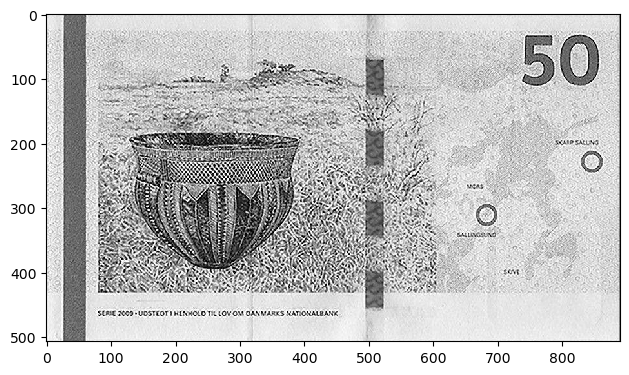

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow

image = imread('Genuine_50_One.png', as_gray=True)
image.shape, imshow(image)

In [8]:
features = np.reshape(image, (507*890))

features.shape, features

((451230,),
 array([0.60840863, 0.98991686, 0.93165882, ..., 0.91597255, 0.90420784,
        0.60224706]))

#### We need to use some statistic functions from scipy to calculate the kurtosis, skew, entropy and var
Note: scipy only has tvar = trimmed variance. But if we don't specicy the limits to be trimmed, it will be similar to the normal variance

In [9]:
def display_prediction(y_pred):
    #Display Prediction results
    class_label =''
    if y_pred_bn==0:
        class_label ='"counterfeit"'
    else:
        class_label = '"Genuine"'
    print('Predicted class membership for the banknote is',y_pred,', which means',class_label)
    
def display_probability(proba):
    prob_label = ''
    prob =0
    if y_pred_bn==0:
        prob_label ='", which mean the probability of being a counterfeit banknote is"'
        prob = proba[:,0]
    else:
        prob_label ='", which means, probability of being a genuine banknote is"'
        prob = proba[:,1]
    print('Predicted probability for the banknote is',prob, prob_label, prob)

#### AdaBoost Classifier (Side 1 of the note)

In [10]:
from scipy.stats import norm, kurtosis, skew, tvar, entropy


#new x
x_bn = pd.DataFrame([[kurtosis(features),skew(features),tvar(features),entropy(features)]], columns=cols[:-1])

adb = AdaBoostClassifier()
adb.fit(X_train, y_train)

y_pred_bn = adb.predict(x_bn)  #predict whether banknote is genuine or counterfeit

In [11]:
display_prediction(y_pred_bn)

Predicted class membership for the banknote is [1] , which means "Genuine"


In [12]:
#predict the probability of belonging to class
pred_prob_bn = adb.predict_proba(x_bn)

In [13]:
#Display the predicted probability of class membership
display_probability(pred_prob_bn)

Predicted probability for the banknote is [0.57420964] ", which means, probability of being a genuine banknote is" [0.57420964]


#### Majority Voting Classifier (side one of the note)

In [14]:
mv_clf = VotingClassifier(estimators=[('lr', lr), ('knn', knn), ('linear_svc', linear_svc), 
                                      ('gamma_svc', gamma_svc), ('dtc', dtc)], voting='soft')

mv_clf.fit(X_train, y_train)

y_pred_mv = mv_clf.predict(x_bn)

In [15]:
#Display Predicted Class Membership
display_prediction(y_pred_mv)

Predicted class membership for the banknote is [1] , which means "Genuine"


In [16]:
pred_prob_mv = mv_clf.predict_proba(x_bn)

In [17]:
#Display the predicted probabilities
display_probability(pred_prob_mv)

Predicted probability for the banknote is [0.52801426] ", which means, probability of being a genuine banknote is" [0.52801426]


Note: 
- For out-of-sample predictions, both algorithms can predict the correct class. AdaBoost perform slightly better than the voting based models. 
- The 'soft' voting performs slightly better than the 'hard' voting. However, you need to enable probability parameter in SVC for it to work 
- For the voting algorithm, if you include the naive bayes classifier as one of the voters, the algorithm will predict the bank note is counterfeit!


### STEP 5.2. PROCESS SIDE TWO OF BANKNOTE AND MAKE PREDICTIONS

((506, 888), <matplotlib.image.AxesImage at 0x1fd83af4d30>)

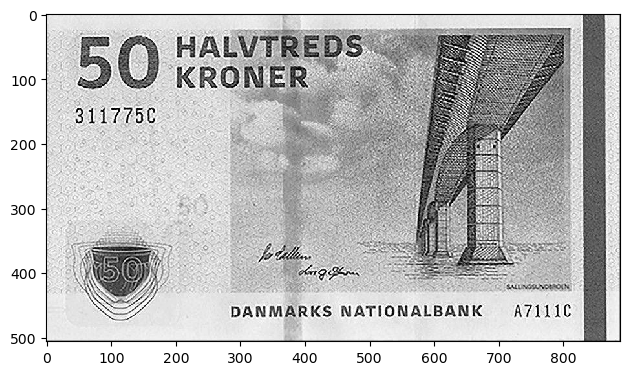

In [18]:

image = imread('Genuine_50_Two.png', as_gray=True)
image.shape, imshow(image)

In [19]:
features1 = np.reshape(image, (506*888))

features1.shape, features1

((449328,),
 array([0.92802   , 0.97172275, 0.93250706, ..., 0.75126667, 0.72997725,
        0.45322745]))

### AdaBoost Classifier (Side 2 of Note)

In [20]:
x_bn1 = pd.DataFrame([[kurtosis(features1),skew(features1),tvar(features1),entropy(features1)]], columns = cols[:-1])
adb = AdaBoostClassifier()
adb.fit(X_train, y_train)

y_pred_bn1 = adb.predict(x_bn1)

In [28]:
x_bn1

,Variance,Skewness,Kurtosis,Entropy
0,0.406115,-1.049834,0.049607,12.952924


In [21]:
#Display Class Membership
display_prediction(y_pred_bn1)

Predicted class membership for the banknote is [1] , which means "Genuine"


In [22]:
#get the predicted probabilities

pred_prob_bn1 = adb.predict_proba(x_bn1)

In [23]:
#Display the predicted probabilities
display_probability(pred_prob_bn1)

Predicted probability for the banknote is [0.60048611] ", which means, probability of being a genuine banknote is" [0.60048611]


### Majority Voting Classifier (Side 2 of the note)

In [24]:
mv_clf = VotingClassifier(estimators=[('lr', lr), ('knn', knn), ('linear_svc', linear_svc), 
                                      ('gamma_svc', gamma_svc), ('dtc', dtc)], voting='soft')

mv_clf.fit(X_train, y_train)

y_pred_mv = mv_clf.predict(x_bn)

In [25]:
#Display class membership
display_prediction(y_pred_mv)

Predicted class membership for the banknote is [1] , which means "Genuine"


In [26]:
#get the predicted probabilities
pred_prob_mv = mv_clf.predict_proba(x_bn1)

In [27]:
#Display the predicted probabilites
display_probability(pred_prob_mv)

Predicted probability for the banknote is [0.6742416] ", which means, probability of being a genuine banknote is" [0.6742416]


Both AdaBoost and majority voting classifiers predict class membership 
correctly, the predicted probability for AdaBoost classifier is lower than the voting classifier.

## How about XGBoost?